In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train_idx = train.shape[0]
test.idx = test.shape[0]

In [5]:
# Inscrição para salvar o arquivo no final
nu_inscricao = test['NU_INSCRICAO']

In [6]:
base = pd.concat(objs=[train, test], axis=0, sort=False).reset_index(drop=True)

In [7]:
print('base: {} x {}'.format(base.shape[0], base.shape[1]))

base: 18306 x 167


In [8]:
base.columns

Index(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       ...
       'Q041', 'Q042', 'Q043', 'Q044', 'Q045', 'Q046', 'Q047', 'Q048', 'Q049',
       'Q050'],
      dtype='object', length=167)

In [9]:
base.drop(['Unnamed: 0','NU_ANO','CO_MUNICIPIO_RESIDENCIA','NO_MUNICIPIO_RESIDENCIA','TP_ESTADO_CIVIL','CO_MUNICIPIO_NASCIMENTO','NO_MUNICIPIO_NASCIMENTO','CO_UF_NASCIMENTO',
                  'SG_UF_NASCIMENTO','CO_ESCOLA','CO_MUNICIPIO_ESC','NO_MUNICIPIO_ESC','CO_UF_ESC','SG_UF_ESC','TP_LOCALIZACAO_ESC','TP_SIT_FUNC_ESC',
                  'IN_DEFICIENCIA_AUDITIVA','IN_SURDO_CEGUEIRA','IN_DEFICIENCIA_FISICA','IN_DEFICIENCIA_MENTAL','IN_DEFICIT_ATENCAO','IN_AUTISMO',
                  'IN_VISAO_MONOCULAR','IN_OUTRA_DEF','IN_LACTANTE','IN_ESTUDA_CLASSE_HOSPITALAR','IN_SEM_RECURSO','IN_BRAILLE','IN_AMPLIADA_24','IN_AMPLIADA_18',
                  'IN_LEDOR','IN_ACESSO','IN_TRANSCRICAO','IN_LIBRAS','IN_LEITURA_LABIAL','IN_MESA_CADEIRA_RODAS','IN_MESA_CADEIRA_SEPARADA','IN_APOIO_PERNA','IN_GUIA_INTERPRETE',
                   'IN_MACA','IN_COMPUTADOR','IN_CADEIRA_ESPECIAL','IN_CADEIRA_CANHOTO','IN_CADEIRA_ACOLCHOADA','IN_PROVA_DEITADO','IN_MOBILIARIO_OBESO','IN_LAMINA_OVERLAY',
                   'IN_PROTETOR_AURICULAR','IN_MEDIDOR_GLICOSE','IN_MAQUINA_BRAILE','IN_SOROBAN','IN_MARCA_PASSO','IN_SONDA','IN_MEDICAMENTOS','IN_SALA_INDIVIDUAL','IN_SALA_ESPECIAL',
                   'IN_SALA_ACOMPANHANTE','IN_MOBILIARIO_ESPECIFICO','IN_MATERIAL_ESPECIFICO','IN_NOME_SOCIAL','IN_CERTIFICADO','NO_ENTIDADE_CERTIFICACAO','CO_UF_ENTIDADE_CERTIFICACAO',
                   'SG_UF_ENTIDADE_CERTIFICACAO','CO_MUNICIPIO_PROVA','NO_MUNICIPIO_PROVA','CO_UF_PROVA','SG_UF_PROVA','TP_PRESENCA_MT','TX_RESPOSTAS_CN','TX_RESPOSTAS_CH',
                   'TX_RESPOSTAS_LC','TX_RESPOSTAS_MT','TX_GABARITO_CN','TX_GABARITO_CH','TX_GABARITO_LC','TX_GABARITO_MT','Q003','Q004','Q005','Q007','Q008','Q009','Q010','Q011','Q012',
                   'Q013','Q014','Q015','Q016','Q017','Q018','Q019','Q020','Q021','Q022','Q023','Q028','Q029','Q030','Q031','Q032','Q033','Q034','Q035','Q036','Q037','Q038',
                   'Q039','Q040','Q041','Q042','Q043','Q044','Q045','Q046','Q048','Q049','Q050'], axis=1, inplace=True)

In [10]:
base.tail()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
18301,dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,41,PR,17,F,1,1,2,0,2,...,40.0,500.0,E,E,D,A,B,A,NaN,A
18302,a75fa8770257e7c9368d059fe53d9ef431f4bdef,35,SP,17,M,2,1,2,0,2,...,100.0,520.0,C,C,C,A,A,A,NaN,A
18303,655fa6306720ff16e825903b5422a46608a77545,35,SP,19,M,1,1,1,2,1,...,80.0,640.0,D,F,D,B,B,A,NaN,D
18304,1f4bc3e3d56212d500625bfe8ac78ccff4362293,52,GO,17,M,2,2,3,0,1,...,80.0,520.0,C,E,C,A,A,A,NaN,A
18305,adf0d15b54317b6564ef56dad2b775bbb0ef50cc,33,RJ,30,M,1,1,1,10,1,...,NaN,NaN,C,C,A,B,B,B,B,A


In [11]:
base.isnull().sum()

NU_INSCRICAO                  0
CO_UF_RESIDENCIA              0
SG_UF_RESIDENCIA              0
NU_IDADE                      0
TP_SEXO                       0
TP_COR_RACA                   0
TP_NACIONALIDADE              0
TP_ST_CONCLUSAO               0
TP_ANO_CONCLUIU               0
TP_ESCOLA                     0
TP_ENSINO                 12544
IN_TREINEIRO                  0
TP_DEPENDENCIA_ADM_ESC    12544
IN_BAIXA_VISAO                0
IN_CEGUEIRA                   0
IN_SURDEZ                     0
IN_DISLEXIA                   0
IN_DISCALCULIA                0
IN_SABATISTA                  0
IN_GESTANTE                   0
IN_IDOSO                      0
TP_PRESENCA_CN                0
TP_PRESENCA_CH                0
TP_PRESENCA_LC                0
CO_PROVA_CN                   0
CO_PROVA_CH                   0
CO_PROVA_LC                   0
CO_PROVA_MT                   0
NU_NOTA_CN                 4523
NU_NOTA_CH                 4523
NU_NOTA_LC                 4796
NU_NOTA_

In [12]:
base[['TP_ENSINO','TP_DEPENDENCIA_ADM_ESC','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','TP_STATUS_REDACAO','NU_NOTA_COMP1','NU_NOTA_COMP2',
     'NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO']].describe()

,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
count,5762.000000,5762.000000,13783.000000,13783.000000,13510.000000,10133.000000,13510.000000,13510.000000,13510.000000,13510.000000,13510.000000,13510.000000,13510.000000
mean,1.179799,2.261020,473.405536,529.544758,515.930762,482.497928,1.100296,119.765507,111.915914,106.714286,113.063286,77.200222,528.659215
std,0.567250,0.703282,71.066673,73.564750,68.452781,99.826323,0.698819,29.642736,33.626733,34.214640,33.409751,43.046225,153.715168
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,419.800000,480.200000,468.200000,408.900000,1.000000,120.000000,100.000000,80.000000,100.000000,40.000000,440.000000
50%,1.000000,2.000000,459.400000,532.000000,519.800000,461.200000,1.000000,120.000000,120.000000,120.000000,120.000000,80.000000,540.000000
75%,1.000000,2.000000,514.450000,580.800000,564.300000,537.600000,1.000000,140.000000,120.000000,120.000000,120.000000,100.000000,600.000000
max,3.000000,4.000000,806.400000,807.000000,763.600000,952.000000,9.000000,200.000000,200.000000,200.000000,200.000000,200.000000,1000.000000


In [13]:
ensino_m = base['TP_ENSINO'].mean()
base['TP_ENSINO'].fillna(ensino_m, inplace=True)

depen_m = base['TP_DEPENDENCIA_ADM_ESC'].mean()
base['TP_DEPENDENCIA_ADM_ESC'].fillna(depen_m, inplace=True)

mt_m = base['NU_NOTA_MT'].mean()
base['NU_NOTA_MT'].fillna(mt_m, inplace=True)

cn_md = base['NU_NOTA_CN'].median()
base['NU_NOTA_CN'].fillna(cn_md, inplace=True)

ch_md = base['NU_NOTA_CH'].median()
base['NU_NOTA_CH'].fillna(ch_md, inplace=True)

lc_md = base['NU_NOTA_LC'].median()
base['NU_NOTA_LC'].fillna(lc_md, inplace=True)

st_redacao_m = base['TP_STATUS_REDACAO'].mean()
base['TP_STATUS_REDACAO'].fillna(st_redacao_m, inplace=True)

nota_c1_m = base['NU_NOTA_COMP1'].mean()
base['NU_NOTA_COMP1'].fillna(nota_c1_m, inplace=True)

nota_c2_m = base['NU_NOTA_COMP2'].mean()
base['NU_NOTA_COMP2'].fillna(nota_c2_m, inplace=True)

nota_c3_m = base['NU_NOTA_COMP3'].mean()
base['NU_NOTA_COMP3'].fillna(nota_c3_m, inplace=True)

nota_c4_m = base['NU_NOTA_COMP4'].mean()
base['NU_NOTA_COMP4'].fillna(nota_c4_m, inplace=True)

nota_c5_m = base['NU_NOTA_COMP5'].mean()
base['NU_NOTA_COMP5'].fillna(nota_c5_m, inplace=True)

nota_redacao_md = base['NU_NOTA_REDACAO'].median()
base['NU_NOTA_REDACAO'].fillna(nota_redacao_md, inplace=True)

In [14]:
base['Q027'].describe()

count     8445
unique      13
top          F
freq      1683
Name: Q027, dtype: object

In [15]:
base['Q027'].fillna('F', inplace=True)

In [213]:
base.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,22,RS,24,1,1,1,1,4,1,...,80.000000,520.0,3,3,2,0,0,2,7,0
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,9,CE,17,0,3,1,2,0,2,...,80.000000,580.0,0,0,1,0,0,0,5,0
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,9,CE,21,0,3,1,3,0,1,...,77.200222,540.0,3,3,2,0,0,0,5,0
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,18,RJ,25,0,0,1,1,9,1,...,77.200222,540.0,7,4,4,2,1,2,5,3
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2,AM,28,1,2,1,1,4,1,...,77.200222,540.0,4,3,2,0,0,1,5,0


In [17]:
base['TP_SEXO'] = base['TP_SEXO'].map({'M': 1, 'F': 0})

In [18]:
from sklearn.preprocessing import LabelEncoder

In [211]:
labelencoder1 = LabelEncoder()
labelencoder2 = LabelEncoder()
labelencoder3 = LabelEncoder()
labelencoder4 = LabelEncoder()
labelencoder5 = LabelEncoder()
labelencoder6 = LabelEncoder()
labelencoder7 = LabelEncoder()
labelencoder8 = LabelEncoder()
labelencoder9 = LabelEncoder()
labelencoder10 = LabelEncoder()

In [214]:
base['Q001'] = labelencoder1.fit_transform(base['Q001'])
base['Q002'] = labelencoder2.fit_transform(base['Q002'])
base['Q006'] = labelencoder3.fit_transform(base['Q006'])
base['Q024'] = labelencoder4.fit_transform(base['Q024'])
base['Q025'] = labelencoder5.fit_transform(base['Q025'])
base['Q026'] = labelencoder6.fit_transform(base['Q026'])
base['Q027'] = labelencoder7.fit_transform(base['Q027'])
base['Q047'] = labelencoder8.fit_transform(base['Q047'])
base['SG_UF_RESIDENCIA'] = labelencoder10.fit_transform(base['SG_UF_RESIDENCIA'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [22]:
# Recuperando os dados de treino e teste
train = base.iloc[:train_idx]
test = base.iloc[train_idx:]

In [29]:
train.shape

(13730, 48)

In [28]:
test.shape

(4576, 47)

In [27]:
# Removento as notas de Matemática de test
test.drop(['NU_NOTA_MT'], axis=1, inplace=True)

KeyError: "['NU_NOTA_MT'] not found in axis"

In [327]:
correlacao = train[['NU_NOTA_MT','NU_NOTA_CH','NU_NOTA_CN','NU_NOTA_LC','TP_SEXO','TP_ESCOLA','TP_ST_CONCLUSAO','TP_ANO_CONCLUIU','Q006','Q024','Q025','Q047']].corr()
#'NU_NOTA_LC','NU_NOTA_CH','NU_NOTA_CN',

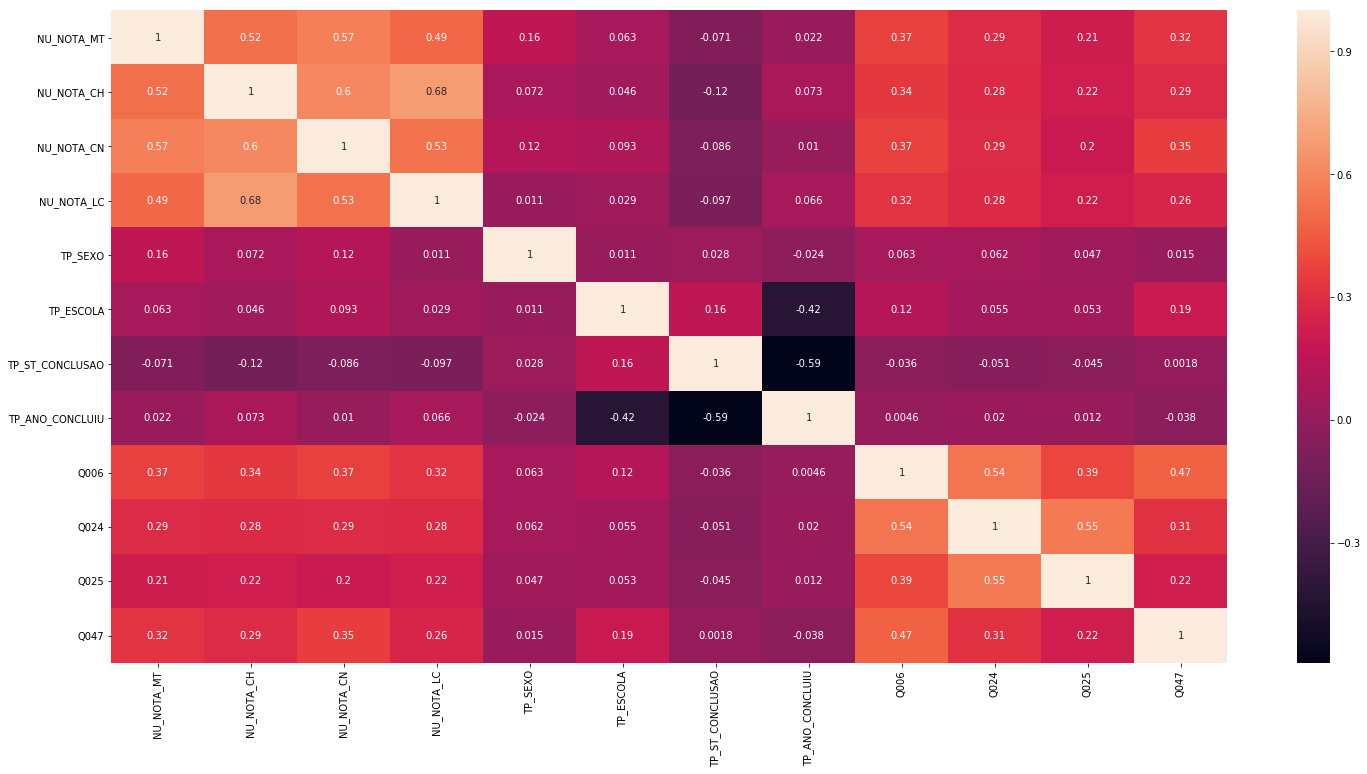

In [328]:
plt.figure(figsize=(25,12))
sns.heatmap(correlacao, annot=True)

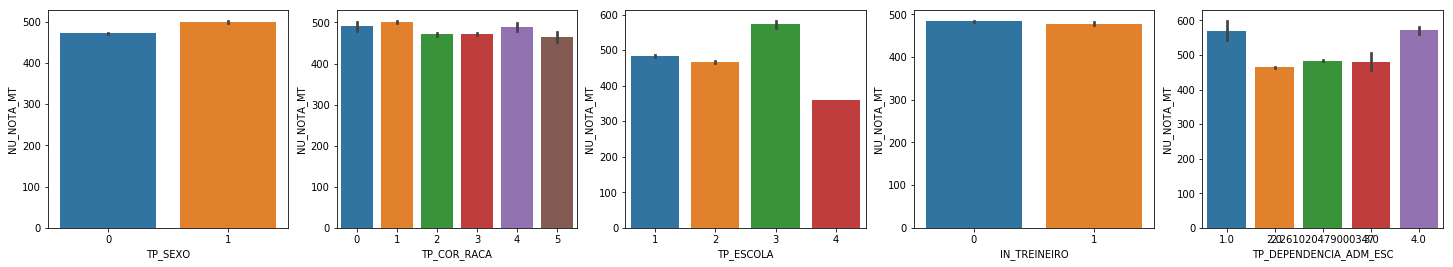

In [54]:
fig, (axis1, axis2, axis3, axis4, axis5) = plt.subplots(1,5, figsize=(25,4))
sns.barplot(x='TP_SEXO', y='NU_NOTA_MT', data=train, ax=axis1)
sns.barplot(x='TP_COR_RACA', y='NU_NOTA_MT', data=train, ax=axis2)
sns.barplot(x='TP_ESCOLA', y='NU_NOTA_MT', data=train, ax=axis3)
sns.barplot(x='IN_TREINEIRO', y='NU_NOTA_MT', data=train, ax=axis4)
sns.barplot(x='TP_DEPENDENCIA_ADM_ESC', y='NU_NOTA_MT', data=train, ax=axis5)

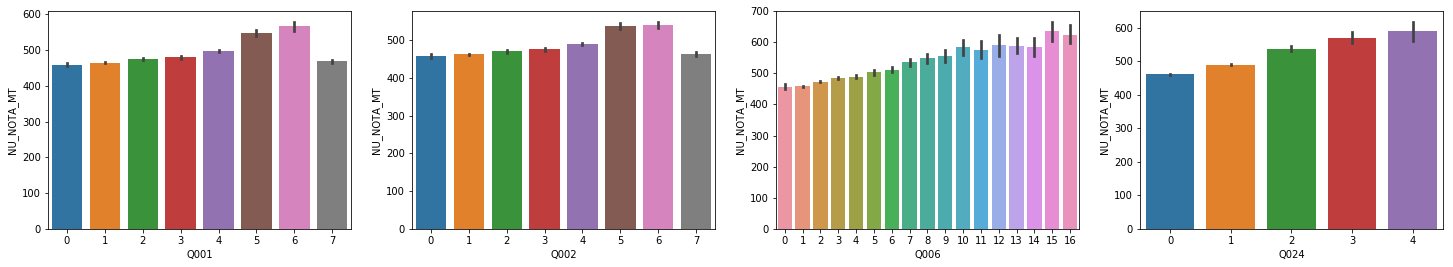

In [57]:
fig, (axis1, axis2, axis3, axis4) = plt.subplots(1,4, figsize=(25,4))
sns.barplot(x='Q001', y='NU_NOTA_MT', data=train, ax=axis1)
sns.barplot(x='Q002', y='NU_NOTA_MT', data=train, ax=axis2)
sns.barplot(x='Q006', y='NU_NOTA_MT', data=train, ax=axis3)
sns.barplot(x='Q024', y='NU_NOTA_MT', data=train, ax=axis4)

In [329]:
X = train[['NU_NOTA_CH','NU_NOTA_CN','NU_NOTA_LC','TP_SEXO','TP_ESCOLA','TP_ST_CONCLUSAO','TP_ANO_CONCLUIU','Q006','Q024','Q025','Q047']]
X1 = train[['NU_NOTA_LC','NU_NOTA_CH','NU_NOTA_CN','Q006']].values

In [136]:
y = train['NU_NOTA_MT'].values

In [163]:
modelo = LinearRegression()
modelo1 = LinearRegression()

In [330]:
modelo.fit(X, y)
modelo1.fit(X1, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [331]:
modelo.coef_

array([ 0.19550695,  0.43726392,  0.24539142, 17.73835745, -1.08252724,
       -1.3093565 , -0.25644218,  3.05467163,  2.58104227,  1.66792169,
        5.47336193])

In [332]:
modelo.intercept_

29.985605106236676

In [333]:
print(modelo.score(X, y))
print(modelo1.score(X1, y))

0.42283438897515346
0.40939498290338966


In [334]:
teste = test[['NU_NOTA_CH','NU_NOTA_CN','NU_NOTA_LC','TP_SEXO','TP_ESCOLA','TP_ST_CONCLUSAO','TP_ANO_CONCLUIU','Q006','Q024','Q025','Q047']]
teste1 = test[['NU_NOTA_LC','NU_NOTA_CH','NU_NOTA_CN','Q006']]

In [193]:
modelo.predict(teste)

array([425.3254242 , 439.16644733, 579.96438827, ..., 622.86657102,
       462.76372177, 480.69868131])

In [194]:
modelo1.predict(teste1)

array([437.52247252, 440.0036753 , 584.12524594, ..., 606.95011572,
       450.35389255, 465.48052479])

### Tentando pro Random Forest Regression

In [149]:
from sklearn.ensemble import RandomForestRegressor

In [355]:
rfr = RandomForestRegressor(n_estimators=1000, random_state=42)

In [356]:
rfr.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [357]:
rfr.score(X, y) * 100

92.35317381505216

In [358]:
rfr.feature_importances_

array([0.1941742 , 0.46254157, 0.15958845, 0.01812929, 0.011641  ,
       0.01581258, 0.03335364, 0.05596435, 0.02156757, 0.01093086,
       0.0162965 ])

In [359]:
submission = rfr.predict(teste)

In [363]:
errors = abs(submission - test)
errors

ValueError: Unable to coerce to Series, length must be 47: given 4576

In [343]:
enviar = pd.DataFrame({
    'NU_INSCRICAO': test.NU_INSCRICAO,
    'NU_NOTA_MT': submission
})

In [344]:
enviar.to_csv('answer.csv', index=False)